In [1]:
import math
from ortools.linear_solver import pywraplp
from ortools.init import pywrapinit
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


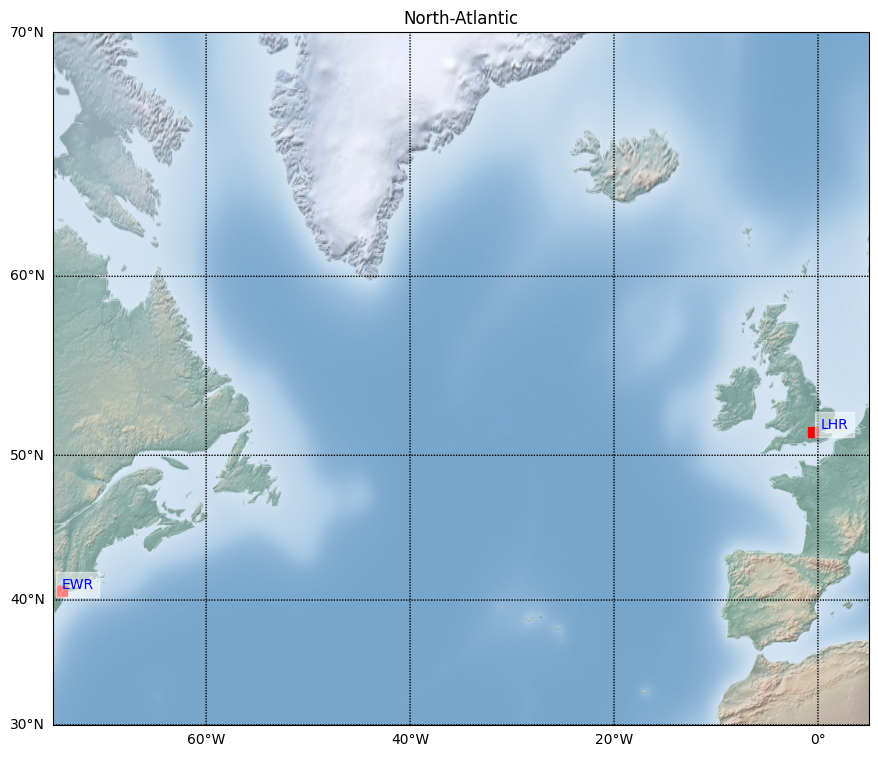

In [2]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
min_lat = 30
max_lat = 70
min_lon = -75
max_lon = 5
fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
m = Basemap(projection='merc', # Mercator Projection
            llcrnrlat=min_lat,
            urcrnrlat=max_lat,
            llcrnrlon=min_lon,
            urcrnrlon=max_lon)
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines
m.shadedrelief(scale=0.5)
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0], zorder=1)
m.drawmeridians(np.arange(-180, 180, 20), labels=[0, 0, 0, 1], zorder=2)


# Set airport locations
LHR = [51.47, -0.45, 24.91]   # (Latitude, Longitude, Altitude)
EWR = [40.69, -74.17, 2.66]   # (Latitude, Longitude, Altitude)
latitudes = [LHR[0],EWR[0]]
longitudes = [LHR[1],EWR[1]]
altitudes = [LHR[2],EWR[2]]
lats = latitudes
lons = longitudes

# compute n# make up some data for scatter plot
x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, 50, marker='s', color='Red') 
text_airport_LHR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
text_airport_EWR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
text_airport_LHR.set_position([x[0]*1.01, y[0]*1.01])
text_airport_EWR.set_position([x[1]*1.02, y[1]*1.02])
text_airport_LHR.set_text('LHR')
text_airport_EWR.set_text('EWR')


plt.title("North-Atlantic")
plt.show()

In [2]:
import pandas as pd
flight_data = pd.read_csv('NA_13_Jun_29_2018_UTC13 (1).csv') # load csv file
flight_data.head(10)

,Flight No.,Timestamp,Altitude,Latitude,Longitude
0,AA101,1530277200,39000.0,50.9,-38.7
1,AA109,1530277200,33000.0,60.3,-12.2
2,AA111,1530277200,39000.0,52.7,-18.1
3,AA113,1530277200,37000.0,43.0,-11.1
4,AA151,1530277200,36400.0,47.0,-27.7
5,AA198,1530277200,0.0,39.9,-73.0
6,AA199,1530277200,37000.0,53.1,-23.8
7,AA204,1530277200,0.0,40.2,-73.6
8,AA209,1530277200,38000.0,58.2,-59.0
9,AA221,1530277200,34000.0,59.7,-51.8


In [3]:
flight_data.shape

(216, 5)

In [4]:
flight_data.iloc[0].Altitude

39000.0

In [3]:
#Using only first 25 samples of the dataset
data_partitioned20 = flight_data.head(20).copy()

In [8]:
LatitudeData = data_partitioned20.Latitude.copy()
LongitudeData = data_partitioned20.Longitude.copy()
AltitudeData = data_partitioned20.copy()
print(LatitudeData)
print(LongitudeData)
print(AltitudeData)

0     50.9
1     60.3
2     52.7
3     43.0
4     47.0
5     39.9
6     53.1
7     40.2
8     58.2
9     59.7
10    51.2
11    39.2
12    42.7
13    49.9
14    44.0
15    53.2
16    48.9
17    54.8
18    48.5
19    53.2
Name: Latitude, dtype: float64
0    -38.70
1    -12.20
2    -18.10
3    -11.10
4    -27.70
5    -73.00
6    -23.80
7    -73.60
8    -59.00
9    -51.80
10   -43.20
11    -8.13
12   -22.20
13   -45.60
14   -40.30
15    -9.80
16   -44.80
17   -67.50
18   -52.10
19   -21.80
Name: Longitude, dtype: float64
   Flight No.   Timestamp  Altitude  Latitude  Longitude
0       AA101  1530277200   39000.0      50.9     -38.70
1       AA109  1530277200   33000.0      60.3     -12.20
2       AA111  1530277200   39000.0      52.7     -18.10
3       AA113  1530277200   37000.0      43.0     -11.10
4       AA151  1530277200   36400.0      47.0     -27.70
5       AA198  1530277200       0.0      39.9     -73.00
6       AA199  1530277200   37000.0      53.1     -23.80
7       AA204  153027

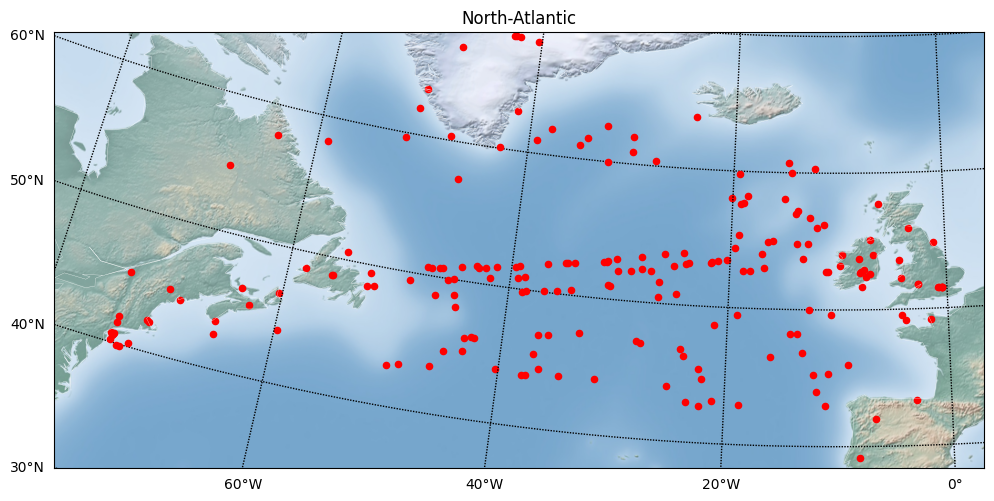

In [6]:
min_lat = 30
max_lat = 70
min_lon = -75
max_lon = 5
fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
m = Basemap(projection='eqdc',  # Equidistant Conic Projection 
            llcrnrlat=min_lat,
            urcrnrlat=max_lat,
            llcrnrlon=min_lon,
            urcrnrlon=max_lon,
            lat_1=10,lat_2=20,lat_0=50,lon_0=-10
           )
# More projection methods can be see from https://matplotlib.org/basemap/users/mapsetup.html# 

m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines
m.shadedrelief(scale=0.5)
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0], zorder=1)
m.drawmeridians(np.arange(-180, 180, 20), labels=[0, 0, 0, 1], zorder=2)


# Set airport locations
LHR = [51.47, -0.45, 24.91]   # (Latitude, Longitude, Altitude)
EWR = [40.69, -74.17, 2.66]   # (Latitude, Longitude, Altitude)
latitudes = [LHR[0],EWR[0]]
longitudes = [LHR[1],EWR[1]]
altitudes = [LHR[2],EWR[2]]
lats_with_head = LatitudeData
lons_with_head = LongitudeData

lats = LatitudeData
lons = LongitudeData
# compute n# make up some data for scatter plot
x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, 20, marker='o', color='Red') 
#text_airport_LHR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
#text_airport_EWR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
#text_airport_LHR.set_position([x[0]*1.01, y[0]*1.01])
#text_airport_EWR.set_position([x[1]*1.02, y[1]*1.02])
#text_airport_LHR.set_text('LHR')
#text_airport_EWR.set_text('EWR')


plt.title("North-Atlantic")
plt.show()



In [4]:
## Function to calculate distances
def calcDistance(location_A, location_B):
    R_E = 6371000   # The radius of earth

    L_a = location_A.Altitude * 0.3048  # get altitude and convert foot to meter
    L_b = location_B.Altitude * 0.3048  # get altitude and convert foot to meter

    Theta_a = location_A.Latitude # get latitude
    Theta_b = location_B.Latitude # get latitude

    Varphi_a = location_A.Longitude# get longitude
    Varphi_b = location_A.Longitude # get longitude

# The below code is to convert (altitude, latitude, longitude) to 3D Cartesian coordinates
    p_xa = (R_E + L_a) * math.cos(math.radians(Theta_a)) * math.cos(math.radians(Varphi_a))  # Eq. (15)
    p_ya = (R_E + L_a) * math.cos(math.radians(Theta_a)) * math.sin(math.radians(Varphi_a))  # Eq. (16)
    p_za = (R_E + L_a) * math.sin(math.radians(Theta_a))  # Eq. (17)

    p_xb = (R_E + L_b) * math.cos(math.radians(Theta_b)) * math.cos(math.radians(Varphi_b))  # Eq. (15)
    p_yb = (R_E + L_b) * math.cos(math.radians(Theta_b)) * math.sin(math.radians(Varphi_b))  # Eq. (16)
    p_zb = (R_E + L_b) * math.sin(math.radians(Theta_b))  # Eq. (17)

# calculate the distance between aircraft a and aircraft b
    d_ab_in_m = math.sqrt((abs(p_xa - p_xb)) ** 2 + (abs(p_ya - p_yb)) ** 2 + (abs(p_za - p_zb)) ** 2)
    #d_ab_in_m = d_ab_in_m/1609.344
    #return distance in meters
    return d_ab_in_m
    

In [9]:
data_partitioned20.head()

,Flight No.,Timestamp,Altitude,Latitude,Longitude
0,AA101,1530277200,39000.0,50.9,-38.7
1,AA109,1530277200,33000.0,60.3,-12.2
2,AA111,1530277200,39000.0,52.7,-18.1
3,AA113,1530277200,37000.0,43.0,-11.1
4,AA151,1530277200,36400.0,47.0,-27.7


In [5]:
#Adding LHR(81.73feet, 51.4700, 0.4543) and EWR to flight_data
data_partitioned20.loc[len(data_partitioned20)] = ['LHR',1530277200,81.73,51.4700,0.4543]
data_partitioned20.loc[len(data_partitioned20)] = ['EWR',1530277200,8.72,40.6895,74.1745]
len(data_partitioned20)

22

In [11]:
data_partitioned20.tail(10)

,Flight No.,Timestamp,Altitude,Latitude,Longitude
12,AA259,1530277200,34000.00,42.7000,-22.2000
13,AA291,1530277200,34900.00,49.9000,-45.6000
14,AA37,1530277200,36000.00,44.0000,-40.3000
15,AA39,1530277200,32000.00,53.2000,-9.8000
16,AA45,1530277200,35600.00,48.9000,-44.8000
17,AA47,1530277200,40000.00,54.8000,-67.5000
18,AA51,1530277200,34000.00,48.5000,-52.1000
19,AA53,1530277200,35000.00,53.2000,-21.8000
20,LHR,1530277200,81.73,51.4700,0.4543
21,EWR,1530277200,8.72,40.6895,74.1745


In [5]:
distance_matrix = []
#Creating distance matrix
for i in range(len(data_partitioned20)):
    distances = [calcDistance(data_partitioned20.iloc[i], data_partitioned20.iloc[x]) for x in range(len(data_partitioned20))]
    distance_matrix.append(distances)

In [14]:
len(distance_matrix)

22

In [15]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_airplanes'] = 216
    data['starts'] = range(216)
    data['ends'] = [216 for i in range(216)]
    return data

In [17]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    for airplane_id in range(data['num_airplanes']):
        index = routing.Start(airplane_id)
        plan_output = 'Route for vehicle {}:\n'.format(airplane_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))

In [21]:
def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_airplanes'], data['starts'],
                                           data['ends'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        20000000000000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == '__main__':
    main()

TypeError: Wrong number or type of arguments for overloaded function 'new_RoutingIndexManager'.
  Possible C/C++ prototypes are:
    operations_research::RoutingIndexManager::RoutingIndexManager(int,int,operations_research::RoutingIndexManager::NodeIndex)
    operations_research::RoutingIndexManager::RoutingIndexManager(int,int,std::vector< operations_research::RoutingIndexManager::NodeIndex > const &,std::vector< operations_research::RoutingIndexManager::NodeIndex > const &)


In [6]:
starts = [i for i in range(20)]
ends = [20 for i in starts]
print(starts)
print(ends)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


In [ ]:
"""Simple Vehicles Routing Problem."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = 20
    data['starts'] = starts
    data['ends'] = ends
    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['starts'],
                                           data['ends'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        20000000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == '__main__':
    main()

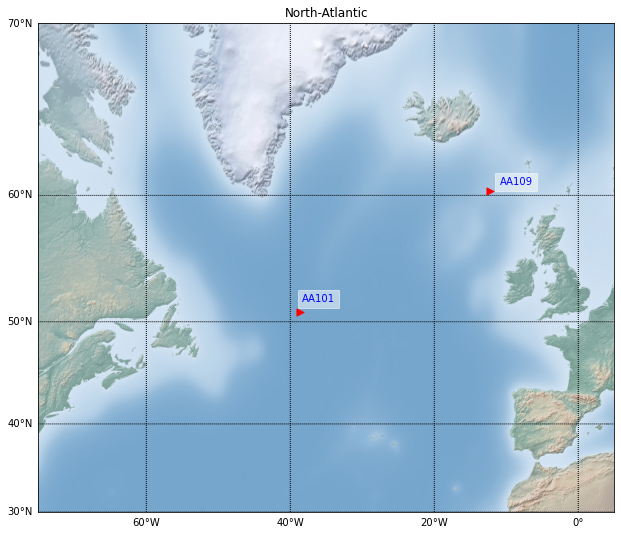

In [11]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
min_lat = 30
max_lat = 70
min_lon = -75
max_lon = 5
fig = plt.figure(figsize=(12, 9))
ax = plt.axes()
m = Basemap(projection='merc', # Mercator Projection
            llcrnrlat=min_lat,
            urcrnrlat=max_lat,
            llcrnrlon=min_lon,
            urcrnrlon=max_lon)
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines
m.shadedrelief(scale=0.5)
m.drawparallels(np.arange(-90, 90, 10), labels=[1, 0, 0, 0], zorder=1)
m.drawmeridians(np.arange(-180, 180, 20), labels=[0, 0, 0, 1], zorder=2)


# Set airport locations
AA101 = [Theta_a, Varphi_a, L_a]   # (Latitude, Longitude, Altitude)
AA109 = [Theta_b, Varphi_b, L_b]   # (Latitude, Longitude, Altitude)
latitudes = [AA101[0],AA109[0]]
longitudes = [AA101[1],AA109[1]]
altitudes = [AA101[2],AA109[2]]
lats = latitudes
lons = longitudes

# compute n# make up some data for scatter plot
x, y = m(lons, lats)  # transform coordinates
plt.scatter(x, y, 50, marker='>', color='Red') 
text_airport_LHR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
text_airport_EWR = ax.text(0, 0, '', c='b', zorder=5, bbox=dict(facecolor='w', alpha=0.5, edgecolor='w'))
text_airport_LHR.set_position([x[0]*1.01, y[0]*1.05])
text_airport_EWR.set_position([x[1]*1.02, y[1]*1.02])
text_airport_LHR.set_text('AA101')
text_airport_EWR.set_text('AA109')


plt.title("North-Atlantic")
plt.show()

In [26]:
import json
# Data to be written into the json file
routing_path = {
    "Source Node": "AA101",
    "Routing Path": '(AA113, 43.505), (AA51, 93.854), (LH421, 43.505), (LHR,93.854)',
    "End-to-end data rate": 43.505
} 
# Serializing json
json_object = json.dumps(routing_path, indent=2)

In [28]:
# Writing to Routing_paths.json
with open("Routing_paths.json", "w") as outfile:
    outfile.write(json_object)
    outfile.write('\n')

In [29]:
# Writing more routing paths to Routing_paths.json
routing_path = {
    "Source Node": "AA102",
    "Routing Path": '(AA115, 63.970), (AA213, 93.854), (LH556, 52.857), (LH128,77.071), (EWR, 63.970)',
    "End-to-end data rate": 52.857
} 
# Serializing json
json_object = json.dumps(routing_path, indent=2)
# Writing to Routing_paths.json
with open("Routing_paths.json", "a") as outfile:
    outfile.write(json_object)
    outfile.write('\n')

In [30]:
# Writing more routing paths to Routing_paths.json
routing_path = {
    "Source Node": "AA103",
    "Routing Path": '(AA105, 93.854), (LH556, 52.857), (AA220, 77.071), (LH228,52.857), (LH138,43.505), (LHR, 63.970)',
    "End-to-end data rate": 43.505
} 
# Serializing json
json_object = json.dumps(routing_path, indent=2)
# Writing to Routing_paths.json
with open("Routing_paths.json", "a") as outfile:
    outfile.write(json_object)
    outfile.write('\n')